# AAI500 Final Project
## Energy Prediction

### Group 3
### Name : Ashley Figueroa
### Name : Robert Shifrin
### Name : Carlo Casella
#### Date : 10 February 2026

This research project focused on developing data-driven predictive models for the energy consumption of appliances in a low-energy "passive" house located in Belgium. The study aimed to identify the most significant environmental and temporal predictors of energy use to improve building performance simulations and energy management.

Appliance Energy Prediction 

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters.
(https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction)




##### Energy Consumption Codes
Appliances: Aggregate electrical energy consumption of all appliances in the house (Wh).
Lights: Sub-metered electrical energy consumption of light fixtures (Wh).
Indoor Environment Codes (T = Temperature, RH = Humidity)

##### Zones or Rooms
• T1 / RH1: Kitchen area. 
• T2 / RH2: Living room area.
• T3 / RH3: Laundry room area.
• T4 / RH4: Office room.
• T5 / RH5: Bathroom.
• T7 / RH7: Ironing room.
• T8 / RH8: Teenager room 2.
• T9 / RH9: Parents room.


##### Weather and Outdoor Codes

• T6 / RH6: Temperature and humidity measured immediately outside the building on the north side.
• To / RHo: Temperature and humidity from the Chièvres weather station.
• Pressure: Atmospheric pressure (mm Hg).
• Windspeed: Wind speed (m/s).
• Visibility: Visibility (km).
• Tdewpoint: Dew point temperature (°C)

##### Time and Statistical Codes
• NSM: Number of Seconds from Midnight; this was identified as the most important predictor for appliance energy use.
• WeekStatus: A categorical variable indicating if the day is a weekday or weekend.
• Day_of_week: The specific day (Monday, Tuesday, etc.).
• RV1 / RV2: Random variables introduced by the researchers to test the effectiveness of their feature selection algorithms


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# Read in the data and display the first 5 rows
energydata = pd.read_csv('energydata_complete.csv')
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [37]:
#convert 'date' column to datetime objects
energydata['date'] = pd.to_datetime(energydata['date'])

In [76]:
#Add time series resolution columns to the data frame
energydata['weekday'] = energydata['date'].dt.day_name().str[:3]
energydata['is_weekend'] = energydata['weekday'].isin(['Sat', 'Sun'])
energydata['day_type'] = np.where(energydata['is_weekend'], 'Weekend', 'Weekday')
energydata['hour'] = energydata['date'].dt.hour


#Number of seconds from midnight NSM
energydata['NSM'] = (energydata['date'] - energydata['date'].dt.normalize()).dt.total_seconds()


In [52]:
energydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

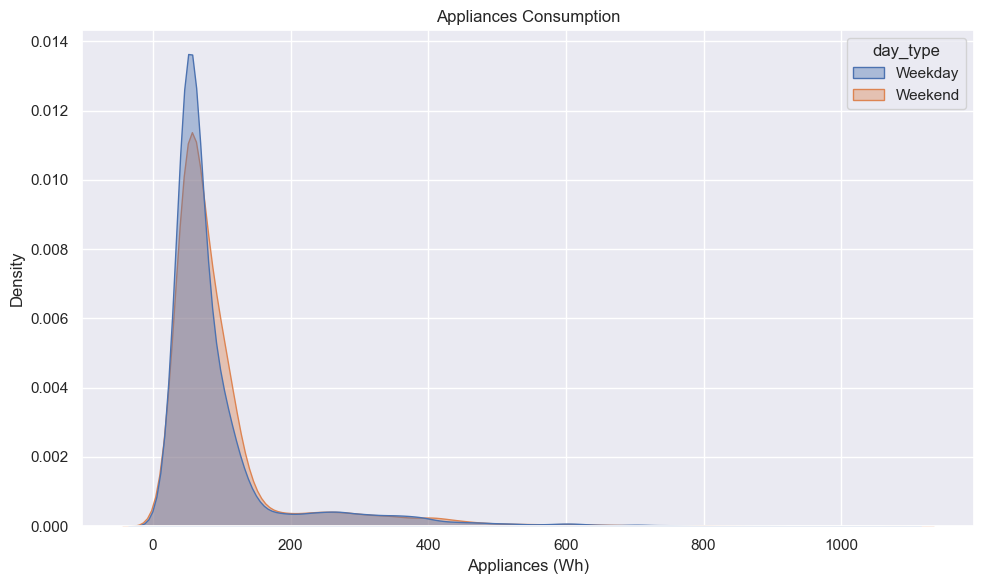

In [77]:
#Probability Density plot of total consumption colored by Weekday type
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=energydata,
    x='Appliances',
    hue='day_type',
    fill=True,
    common_norm=False,
    alpha=0.4
)
plt.title('Appliances Consumption')
plt.xlabel('Appliances (Wh)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

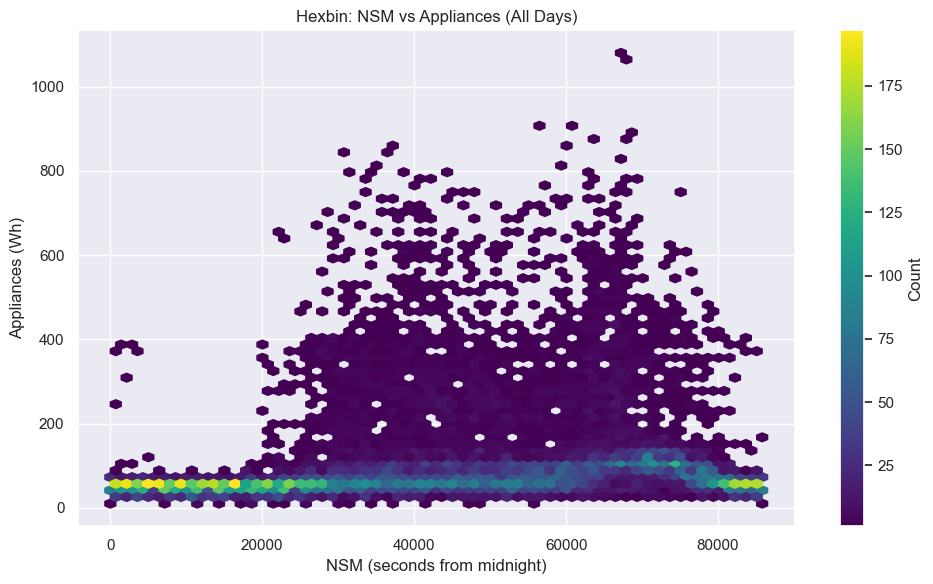

In [78]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    energydata['NSM'],
    energydata['Appliances'],
    gridsize=60,
    cmap='viridis',
    mincnt=1
)
plt.colorbar(label='Count')
plt.title('Hexbin: NSM vs Appliances (All Days)')
plt.xlabel('NSM (seconds from midnight)')
plt.ylabel('Appliances (Wh)')
plt.tight_layout()
plt.show()




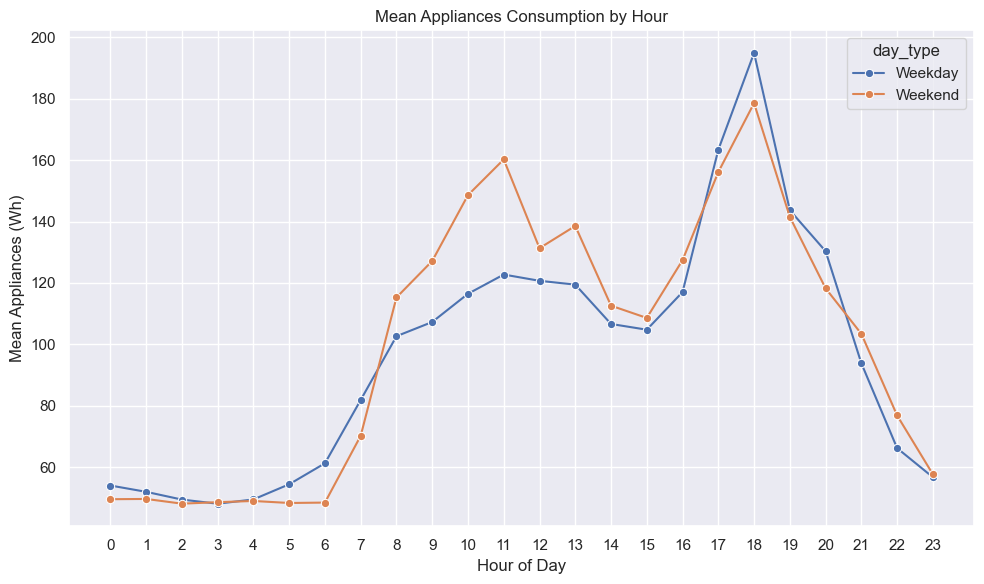

In [79]:
#Time of day Appliance consumption per hour
mean_by_hour = (
    energydata.groupby(['hour', 'day_type'])['Appliances']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=mean_by_hour,
    x='hour',
    y='Appliances',
    hue='day_type',
    marker='o'
)
plt.title('Mean Appliances Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Appliances (Wh)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

